In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("data/house-votes-84.data")
print(df.columns)
print(df.head())
print(df.shape)
df.head()

Index(['republican', 'n', 'y', 'n.1', 'y.1', 'y.2', 'y.3', 'n.2', 'n.3', 'n.4',
       'y.4', '?', 'y.5', 'y.6', 'y.7', 'n.5', 'y.8'],
      dtype='object')
   republican  n  y n.1 y.1 y.2 y.3 n.2 n.3 n.4 y.4  ? y.5 y.6 y.7 n.5 y.8
0  republican  n  y   n   y   y   y   n   n   n   n  n   y   y   y   n   ?
1    democrat  ?  y   y   ?   y   y   n   n   n   n  y   n   y   y   n   n
2    democrat  n  y   y   n   ?   y   n   n   n   n  y   n   y   n   n   y
3    democrat  y  y   y   n   y   y   n   n   n   n  y   ?   y   y   y   y
4    democrat  n  y   y   n   y   y   n   n   n   n  n   n   y   y   y   y
(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [3]:
X = df.drop('republican', axis='columns')
y = df.republican
print(X.shape)
print(y.shape)

(434, 16)
(434,)


In [4]:
X = pd.get_dummies(X)

print(X.columns)
feature_names = X.columns
print(X)
X.head()

Index(['n_?', 'n_n', 'n_y', 'y_?', 'y_n', 'y_y', 'n.1_?', 'n.1_n', 'n.1_y',
       'y.1_?', 'y.1_n', 'y.1_y', 'y.2_?', 'y.2_n', 'y.2_y', 'y.3_?', 'y.3_n',
       'y.3_y', 'n.2_?', 'n.2_n', 'n.2_y', 'n.3_?', 'n.3_n', 'n.3_y', 'n.4_?',
       'n.4_n', 'n.4_y', 'y.4_?', 'y.4_n', 'y.4_y', '?_?', '?_n', '?_y',
       'y.5_?', 'y.5_n', 'y.5_y', 'y.6_?', 'y.6_n', 'y.6_y', 'y.7_?', 'y.7_n',
       'y.7_y', 'n.5_?', 'n.5_n', 'n.5_y', 'y.8_?', 'y.8_n', 'y.8_y'],
      dtype='object')
       n_?    n_n    n_y    y_?    y_n    y_y  n.1_?  n.1_n  n.1_y  y.1_?  \
0    False   True  False  False  False   True  False   True  False  False   
1     True  False  False  False  False   True  False  False   True   True   
2    False   True  False  False  False   True  False  False   True  False   
3    False  False   True  False  False   True  False  False   True  False   
4    False   True  False  False  False   True  False  False   True  False   
..     ...    ...    ...    ...    ...    ...    ...    ...

,n_?,n_n,n_y,y_?,y_n,y_y,n.1_?,n.1_n,n.1_y,y.1_?,...,y.6_y,y.7_?,y.7_n,y.7_y,n.5_?,n.5_n,n.5_y,y.8_?,y.8_n,y.8_y
0,False,True,False,False,False,True,False,True,False,False,...,True,False,False,True,False,True,False,True,False,False
1,True,False,False,False,False,True,False,False,True,True,...,True,False,False,True,False,True,False,False,True,False
2,False,True,False,False,False,True,False,False,True,False,...,True,False,True,False,False,True,False,False,False,True
3,False,False,True,False,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,False,True
4,False,True,False,False,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,False,True


In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                     stratify=y, random_state=1)


In [6]:
for d in range(1,12):
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Depth: ", d, "Validation Accuracy:", scores.mean())

Depth:  1 Validation Accuracy: 0.9569230769230769
Depth:  2 Validation Accuracy: 0.9569230769230769
Depth:  3 Validation Accuracy: 0.9538461538461538
Depth:  4 Validation Accuracy: 0.9569230769230769
Depth:  5 Validation Accuracy: 0.9476923076923077
Depth:  6 Validation Accuracy: 0.9507692307692308
Depth:  7 Validation Accuracy: 0.9353846153846155
Depth:  8 Validation Accuracy: 0.9476923076923077
Depth:  9 Validation Accuracy: 0.9538461538461538
Depth:  10 Validation Accuracy: 0.9476923076923077
Depth:  11 Validation Accuracy: 0.9384615384615385


In [7]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)


print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))



Training Accuracy: 1.0
Test Accuracy: 0.944954128440367


In [8]:
y_hat = model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[61  6]
 [ 0 42]]

TN 61 FP 6 FN 0 TP 42


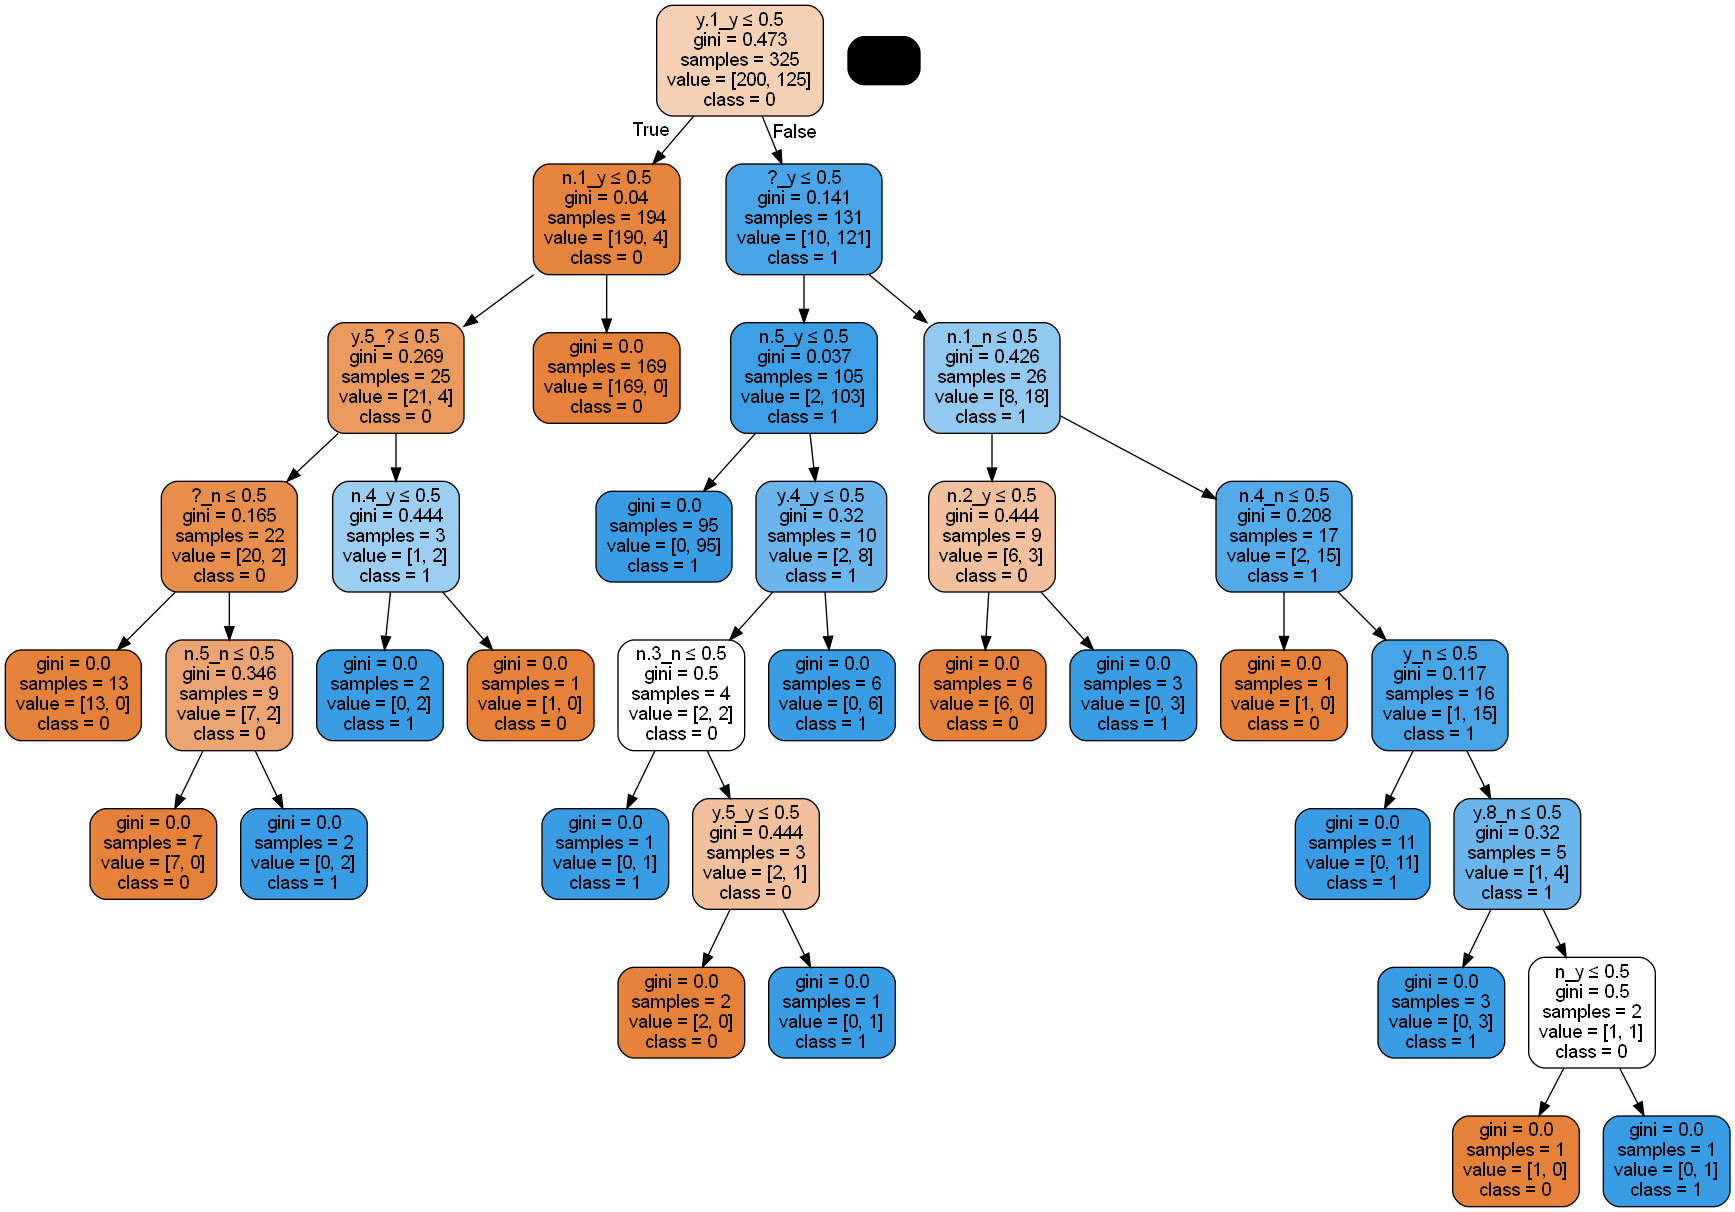

In [9]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
               special_characters=True, class_names=['0','1'],
                feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/house.png')
Image(graph.create_png())